# Week 1: Introduction to TensorFlow

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

TensorFlow is a library (usually used with Python) developed by Google Brain for training and running statistical machine learning models.
It is extremely flexible, making almost no assumptions about your model except that you can represent it as a graph of math operations.
As a result, it sees lots of use in developing new machine learning models, as well as efficiently training and running existing models.

Advantages of TensorFlow over other frameworks:
 - Most flexible by far -- can use basically any differentiable equation as a model
 - Most popular and heavily-developed framework by far, used by numerous companies
 - Works well with CPUs, GPUs, and TPUs (Tensor Processsing Units), and across lots of devices, including distributed training
 - Incredible debugging and visualization utilities (TensorBoard and tfdbg)
 - Graph compilation can optimize your code for you
 - Gives you lots of control over hardware (e.g. whether variables live in CPU or GPU memory)
 - Open-source!

Disadvantages:
 - Graph programming unfamiliar to many people
 - Hard to search documentation, lots of deprecated and soon-to-be-deprecated APIs (with TensorFlow 2.0, this will hopefully change)
 - Generally more verbose and difficult to develop models (but we will also learn Keras, a library meant to make building common models in TensorFlow very simple)
 - Can be slower than other frameworks for certain models (Apache MXNET)
 - TensorFlow itself doesn't support every kind of statistical model, most notably "graphical models" associated with Bayesian statistics (although, see [bayesflow](https://www.tensorflow.org/api_docs/python/tf/contrib/bayesflow)) 

## Why care?

Because it lets you do all of the awesome things machine learning can do:
 - [Translate between any two human languages](https://code.fb.com/ai-research/laser-multilingual-sentence-embeddings/)
 - [Play games with superhuman skill](https://deepmind.com/blog/alphazero-shedding-new-light-grand-games-chess-shogi-and-go/)
 - [Make a picture look like it was painted by Picasso](http://genekogan.com/works/style-transfer/)
 - [Generate realistic human faces](https://blog.openai.com/glow/) 
 - [See through walls with WiFi](https://news.mit.edu/2018/artificial-intelligence-senses-people-through-walls-0612)
 - [Have your phone make calls for you](https://ai.googleblog.com/2018/05/duplex-ai-system-for-natural-conversation.html)
 - [Find every tree in the world (shameless self-plug)](https://medium.com/descarteslabs-team/descartes-labs-urban-trees-tree-canopy-mapping-3b6c85c5c9cc)
 * ...
 
 For example, the people in these pictures never existed but were synthesized by a neural network:
![Faces generated by neural network](https://research.nvidia.com/sites/default/files/publications/representative_image_512x256.png)
(Image credit: [Nvidia Research, Progressive Growing of GANs for Improved Quality, Stability, and Variation](https://research.nvidia.com/publication/2017-10_Progressive-Growing-of))

## Overview of TensorFlow API levels
![tensorflow api levels](https://3.bp.blogspot.com/-l2UT45WGdyw/Wbe7au1nfwI/AAAAAAAAD1I/GeQcQUUWezIiaFFRCiMILlX2EYdG49C0wCLcBGAs/s1600/image6.png)

We'll be focusing on three of these:
 - Python frontend (or "operations-level TensorFlow") lets you build a computational graph by hand for maximum power and flexibility
 - Keras to build neural networks quickly and easily
 - Datasets API to load and preprocess data efficiently 
 
This covers the two most common tasks: using Keras to build a simple neural network using common kinds of layers (like fully-connected, convolutional, and recurrent layers), and using operations-level TensorFlow to develop a novel model.
 
(Image credit: [Google Developers Blog, Introduction to TensorFlow Datasets and Estimators](https://developers.googleblog.com/2017/09/introducing-tensorflow-datasets.html))

## Tensors and tensor values
To do machine learning, you _really_ need to understand tensors and the terminology surrounding them.
You can (for machine learning, at least) think of tensors as multidimensional arrays.

![tensors](./images/tensors_diagram.jpg)

In TensorFlow, `tf.Tensor` objects act as "placeholders" (more on this later) for _tensor values_, which are numpy arrays.
I'll try to stick to the notation **"tensor"** to mean `tf.Tensor` objects and **"tensor value"** to mean a multidimensional numpy array.
The terminology around tensors and tensor values is the same.

A tensor consists of a number of **scalars** organized in some "rectangular" way.
Scalars have a [**data type**](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType), usually a real floating-point number (`tf.float32`), integer (`tf.int32`), or boolean (`tf.bool`).
To access a particular scalar in a tensor, provide an index in each of its **axes** (also called **dimensions**).
The total number of axes a tensor has is its **rank**, and each axis has a fixed **size** which determines how many sub-tensors (of rank one less than the parent) you can get by indexing into just that axis.
The total number of scalars a tensor can hold is the product of the sizes of its axes (unless it's rank-zero, then it holds a single value).

All of the "size" properties of a tensor are encapsulated by its **shape**, which fully specifies how many axes it has, what order they come in, and what their sizes are.
A tensor's shape is given by a tuple.
For example:
 - a tensor with shape (3) is a vector (rank-1 tensor) with 3 elements
 - a tensor with shape (3, 4) is a matrix (rank-2 tensor) with 3 rows and 4 columns
 - a tensor with shape () is a scalar (rank-0 tensor; you need no indices to uniquely identify its only element)
 - a tensor with shape (2, 2, 2) (rank-3 tensor) is a 2x2x2 "data cube"
 - a tensor with shape (3, 1) is a matrix (rank-2 tensor) with 3 rows and 1 column; subtle difference from having shape (3)
 
When you provide an index for $n$ axes of a rank-$r$ tensor, you get back a tensor with rank $r - n$, and a shape the same as the original but with the indexed axes removed.
Numpy and TensorFlow have roughly the same notation for indexing into tensors to obtain sub-tensors.
Similarly, some operations called **reductions** operate across one or more axes of a tensor, collapsing those axes into a scalar summarizing their elements.
For instance, `tf.reduce_sum` applied to every axis of a tensor outputs a scalar equal to the sum of its scalars.
`tf.reduce_mean` applied to axis 0 of a rank-2 tensor returns a vector that, for each column, contains a scalar of the mean of all of the rows in that column. 

Matrix transposition (which swaps the rows and columns of a matrix) has a natural extension to tensors: it just reorders their axes.
You can "reshape" a tensor into a _compatible_ shape, which is to say one where the total number of scalars remains the same.

I highly recommend understanding numpy indexing, including some of the advanced stuff you can do (like broadcasting, masking, and `np.where`) since a lot of this transfers to TensorFlow.

For a good guide to numpy indexing, read https://realpython.com/numpy-array-programming/.
For more on tensors, you can read https://www.tensorflow.org/guide/tensors.

In [2]:
# Examples of creating tensor values in numpy
print('Tensor values:')
print(np.array(3), '\n')           # A rank-zero tensor with shape ()
print(np.array([1, 2, 3]), '\n')   # A rank-one tensor with shape (3)
print(np.array([[1, 2],
                 [3, 4]]), '\n')   # A rank-two tensor with shape (2, 2)
print(np.array([[[1, 2],
                 [3, 4]],
                [[5, 6],
                 [7, 8]]]), '\n')  # A rank-three tensor with shape (2, 2, 2)
print(np.array([[1, 2, 3]]), '\n') # A rank-two tensor with shape (1, 3)

# Example of printing tensor shapes
print('Tensor shapes:')
print(np.array([[1, 2], [3, 4]]).shape)
print(np.array(3).shape, '\n')

# Example of printing tensor rank
print('Tensor rank:', 
      np.array([[1, 2], [3, 4]]).ndim,
      '\n')

# Examples of indexing
print('Tensor indexing:')
a = np.array([[[1, 2],
                 [3, 4]],
                [[5, 6],
                 [7, 8]]])

print('a:', a, '\n')

print('a[0, 0, 0] =', a[0, 0, 0])  # Selecting a particular scalar
print('a[0, 0, 1] =', a[0, 0, 1])
print('a[0, 1, 0] =', a[0, 1, 0])
print('a[1, 0, 0] =', a[1, 0, 0], '\n')

print('a[0, 0, :] =', a[0, 0, :])   # Take the first value on axes 0 and 1, 
                                    # leaving axis 2 alone
print('a[:, 0, :] =\n', a[:, 0, :]) # Take the first value on axis 2, 
                                    # leaving axes 0 and 2 alone

Tensor values:
3 

[1 2 3] 

[[1 2]
 [3 4]] 

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

[[1 2 3]] 

Tensor shapes:
(2, 2)
() 

Tensor rank: 2 

Tensor indexing:
a: [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

a[0, 0, 0] = 1
a[0, 0, 1] = 2
a[0, 1, 0] = 3
a[1, 0, 0] = 5 

a[0, 0, :] = [1 2]
a[:, 0, :] =
 [[1 2]
 [5 6]]


## Differentiable programming
Differentiable programming is a paradigm in which a program is represented as a **dataflow graph**: _mathematical computations organized as a directed graph_:
![a computational graph](https://colah.github.io/posts/2015-08-Backprop/img/tree-def.png)

(Image credit: [Chris Olah's blog, Calculus on Computational Graphs: Backpropagation](https://colah.github.io/posts/2015-08-Backprop/))

Nodes in the graph are operations, and edges are tensors, which flow between operations (hence the name).
When you want to evaluate an operation (say, to get its output tensor), all of the operations that produce tensors it depends on (found by stepping back one layer in the graph) are evaluated, and so on recursively.
In this way, you can define a bunch of interconnected computations as a single graph, and when you want to compute a value, TensorFlow will run _only the computations it needs to to compute your value_.
During a single evaluation, tensors have fixed values, so TensorFlow will cache that value in order to prevent computing the same thing multiple times.
For instance, when evaluating "e" in the above graph, the value of "b" is computed only once despite being used twice.

It's very useful to keep the graph formalism in mind when writing TensorFlow code, and we'll return to the core ideas of differentiable programming again and again in this course.
Because you completely define the graph before running it, TensorFlow can also [optimize the graph with the XLA compiler](https://www.tensorflow.org/xla/), doing things like fusing operations and doing clever memory-saving hacks.

The key feature that separates differentiable programming from ordinary graph programming is that in graph programming, _you only use differentiable operations_.
What this means is that you can use the chain rule (see the next lecture, on the Backpropagation algorithm) to compute _the gradient of any value in the graph with respect to any other value in the graph_.
This is incredibly powerful!

Critically, you can use _gradient-based optimization methods_ to maximize or minimize values in the graph by changing variable tensors earlier in the graph.
This is how we train machine learning models using TensorFlow.
The most common family of such optimization algorithms is... 

## Gradient descent
Gradient descent is a simple and powerful algorithm for minimizing differentiable functions.
I'll describe it only briefly here because there are [plenty](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent) [of](https://work.caltech.edu/library/101.html) [good](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da) [explanations](https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0) [online](https://www.youtube.com/watch?v=jc2IthslyzM).

For a differentiable function $f(\vec{x})$, the gradient $\nabla_\vec{x} f$ gives the direction of steepest increase of $f$ -- the direction to move the parameters $\vec{x}$ that increases $f$ the most, in a small region around the value of $\vec{x}$. 
If we want to minimize $f$, we can therefore keep track of a "current value of $\vec{x}$" and repeatedly take small steps in the opposite direction of the gradient.

The size of step is the **learning rate**, denoted $\alpha$.
It should be small, or else we'll overshoot the area where we can assume the gradient really gives the direction of steepest increase (where the linear term in the Taylor series of the function no longer dominates).
For steep gradients, we take bigger steps because we have a stronger signal of where the parameters $\vec{x}$ should go.
For $\alpha$ too small, we converge too slowly to a minimum (by taking very many small steps).
For $\alpha$ too large, we may not be able to minimize the function at all.

![gradient descent visualization](./images/gradient_descent.jpg)

In machine learning, we define a value that quantifies how badly our model fits the data (the "loss" or "training error"), then use gradient descent to change the parameters of our model (made possible by differentiable programming) to minimize that value.

Below is some example code that computes the gradients and applies the updates by hand to minimize $f(x) = x^2$.
TensorFlow will do this for you (and one of the problems on the first lab is to minimize a simple function with TensorFlow).

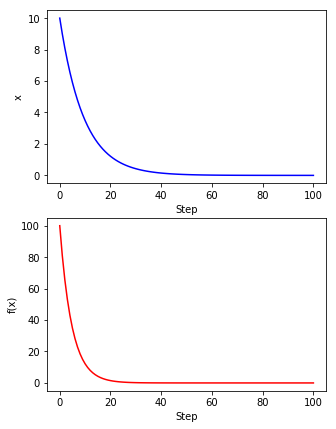

Final value of x: 0.00026561398887587435
Final value of f(x): 7.05507910865531e-08


In [3]:
# An example of minimizing the function f(x) = x^2 with gradient descent
def f(x): return x**2
def grad_f(x): return 2*x # Gradient of f(x), computed by hand

x = 10
learning_rate = 0.05
x_values = [x]
y_values = [f(x)]

for step in range(100):
    x = x - learning_rate * grad_f(x)
    x_values.append(x)
    y_values.append(f(x))
    
plt.figure(figsize=(5, 7))
plt.subplot(2, 1, 1)
plt.plot(range(101), x_values, 'b-')
plt.xlabel('Step')
plt.ylabel('x')

plt.subplot(2, 1, 2)
plt.plot(range(101), y_values, 'r-')
plt.xlabel('Step')
plt.ylabel('f(x)')
plt.show()

print('Final value of x:', x)
print('Final value of f(x):', f(x))

### Aside on local minima 
Gradient descent is only guaranteed to converge to the global minimum of a _convex_ function.
This seems like a problem, since most loss functions we want to minimize are not convex.
However, local minima are very rare in high-dimensional space: for a random function to be a local minimum in $n$-dimensional space, it needs to curve upwards on _every_ axis, so it has probability $\propto 2^{-n}$.
For neural networks, the vector space of possible parameter values can have millions of parameters.

Instead, we usually care about _saddle points_, where the loss function looks locally flat.
Modern variants of gradient descent like momentum, adagrad, and Adam approach this problem by using more information than just the gradient to make parameter updates.
But, how to handle these points best when training neural networks (and even how much of a problem they are) is still somewhat of an open problem.

## Graph programming in TensorFlow
TensorFlow programs are divided into two halves: building the graph and evaluating subgraphs of the graph.

In the first step, a `tf.Graph` represents a complete computational graph, consisting of `tf.Operation` nodes and `tf.Tensor` edges.
You can create multiple graphs, but I suggest always using the default one (at least for now).
When you call a function corresponding to a TensorFlow operation, what you're really doing is _adding that operation to the graph_ -- the function returns a `tf.Tensor`, which you can use as inputs to other operations to chain them together in a graph.
So, you should call each function _exactly once per node you want in your graph_, or you'll wind up with duplicates and buggy code.

As a general rule, calling a function **adds an operation to the graph** and **returns a tensor** which you can use as input for one or more operations.
Recall that a tensor is just a placeholder for a tensor value, and does not have a value until it is evaluated in a run.

Operations have names, which are passed down to the tensors they create.
_You should always set the names of your important operations!_
Operations can also live inside "name scopes", which add a common prefix to all enclosed operation names and allows for collapsing them into a single node in TensorBoard, defined in terms of its inputs and outputs.
_Use name scopes where appropriate_.
Think of names and name scopes like commenting: they're a little thing that will make debugging, maintenance, and development much easier, especially once you start using TensorBoard and tfdbg.

To include fixed values in your graph, use the `tf.constant` operation (yes, it's an operation) that returns a constant tensor.
To include values that can change between runs, like trainable parameters of a model, you want to create `tf.Variables`, which are a type of tensor.
The best way to use variables is to call [tf.get_variable()](https://www.tensorflow.org/api_docs/python/tf/get_variable), which takes a **name** for the variable and an **initializer**.
Before using a variable, you need to run its initializer at least once, either through `my_variable.initializer` or `tf.global_variables_initializer()`, which initializes all variables and is usually preferred.

For experimentation, consider using a `tf.placeholder`, which takes a datatype and a shape and can be "fed" with values during execution.

You should really read [the official TensorFlow guide on graphs and sessions](https://www.tensorflow.org/guide/graphs), or at least skim it.
The [guide on variables is worthwhile too](https://www.tensorflow.org/guide/variables).
Look up and read the documentation on constants, variables, and placeholders.

In the second step, a `tf.Session` represents the _context of a computation_, and is required to evaluate tensors.
The `run` function of a session, given a tensor or list of tensors, recursively evaluates operations to eventually return the tensor's value.
It can also take a dictionary of "feeds", which can replace the value of any tensor in the graph with an alternative value.
This is usually used to feed placeholders, but you can overwrite any tensor value this way.

Optimization is performed by instantiating an optimizer with necessary parameters, such as `optimizer = tf.train.GradientDescentOptimizer(0.01)` for simple gradient descent with a learning rate of 0.01.
Then, `optimize_step = optimizer.minimize(loss)` calls an operation function that takes in a tensor `loss` and returns a value `optimize_step` that, when evaluated, returns nothing, but changes the variables in your graph to minimize the input.

## TensorBoard
TensorBoard is a visualization and debugging utility that runs as a command-line program hosting a local website at http://localhost:6006.

To use it, you need a `tf.summary.FileWriter` to write log files locally.

If you give it a graph on initialization, it will visualize everything added to the graph -- otherwise, call its `add_graph()` function later.
This allows for visualizing your whole computational graph in the "Graphs" tab.
Expand and collapse composite nodes by double-clicking.

To plot values from the graph, you can use "summary operations" which return log files when run.
Typically, you just add the summary operations to the graph, then save an operation obtained by `tf.summary.merge_all()`, which returns a single composite summary object when run.
If you run that operation through a seession, it returns a summary file that you then pass to `writer.add_summary(...)` to log all of the scalars at once.

If you're interested, read [the official TensorBoard Guide](https://www.tensorflow.org/guide/summaries_and_tensorboard) which goes into much more detail.

## Full program example
Below is an example of performing the minimization of $f(x) = x^2$ from before, including logging the graph for visualization, as well as plotting $x$ and $f(x)$ throughout training.
If you run it locally, then run `tensorboard --logdir lecture_logs` and navigate to http://localhost:6006, you can view these.

In [4]:
# Create FileWriter
writer = tf.summary.FileWriter('./lecture_logs')

# Add operations to the default graph
with tf.name_scope('minimize_x_squared'):
    # Create input variable
    x = tf.get_variable('x', shape=(), dtype=tf.float32, 
                        initializer=tf.constant_initializer(10)) 
    
    # Compute f(x) = x^2
    # `tf.pow` takes in two tensors and returns a tensor
    y = tf.pow(x, tf.constant(2.0), name='y')
    
    # Create optimization operator
    optimize_step = tf.train.GradientDescentOptimizer(0.05, name='optimizer').minimize(y)
    
    # Create summary operations
    tf.summary.scalar('x', x) # Adds operations without giving us a handle to them
    tf.summary.scalar('f(x)', y)
    merged_summary = tf.summary.merge_all() # This operation runs all summary ops

INFO:tensorflow:Summary name f(x) is illegal; using f_x_ instead.


In [5]:
# Run training
with tf.Session() as sess: # Create a session
    writer.add_graph(sess.graph) # Write the graph to log files
    
    sess.run(tf.global_variables_initializer()) # Initialize all variables
    
    print('Initial value of x:', sess.run(x))
    print('Initial value of f(x):', sess.run(y))
    
    for step in range(100):
        sess.run(optimize_step)
        summary = sess.run(merged_summary)
        writer.add_summary(summary, step)
        
    print('Final value of x:', sess.run(x))
    print('Final value of f(x):', sess.run(y))
    
    writer.flush() # Ensure that the writer has written logs

Initial value of x: 10.0
Initial value of f(x): 100.0
Final value of x: 0.00026561393
Final value of f(x): 7.0550755e-08


## Deeper graph example
This code creates the computational graph pictured above as a TensorFlow graph, showcasing overloading on arithmetic operators, using placeholders, and bigger graph visualization in TensorBoard.

In [6]:
with tf.name_scope('example_graph'):
    a = tf.placeholder(tf.float32, (), name='a') # Returns a tensor that must be fed
    b = tf.placeholder(tf.float32, (), name='b')
    c = a + b # This is shorthand for the operator function tf.add(a, b)
    d = b + tf.constant(1.0)
    e = c * d
    
writer.add_graph(tf.get_default_graph())
writer.flush()

In [7]:
with tf.Session() as sess:
    print('a =', sess.run(a, feed_dict={a: 1}))
    print('a =', sess.run(a, feed_dict={a: 2}))
    print('e =', sess.run(e, feed_dict={a: 1, b: 2}))

a = 1.0
a = 2.0
e = 9.0


#### Whew! That's all the basics of writing code in TensorFlow. More interesting problems and models to come :)